#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/uKAq34QrbwTcbs5Z9 (Submit your .ipynb file)

In [340]:
# mount data from google drive to colab
#from google.colab import drive
#drive.mount('/content/drive')

#import library
import pandas as pd # pandas
import numpy as np # numpy
import time # time

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [341]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income (USD)'}>],
       [<Axes: title={'center': 'Property Age'}>,
        <Axes: title={'center': 'Property Price'}>],
       [<Axes: title={'center': 'Loan Sanction Amount (USD)'}>, <Axes: >]],
      dtype=object)

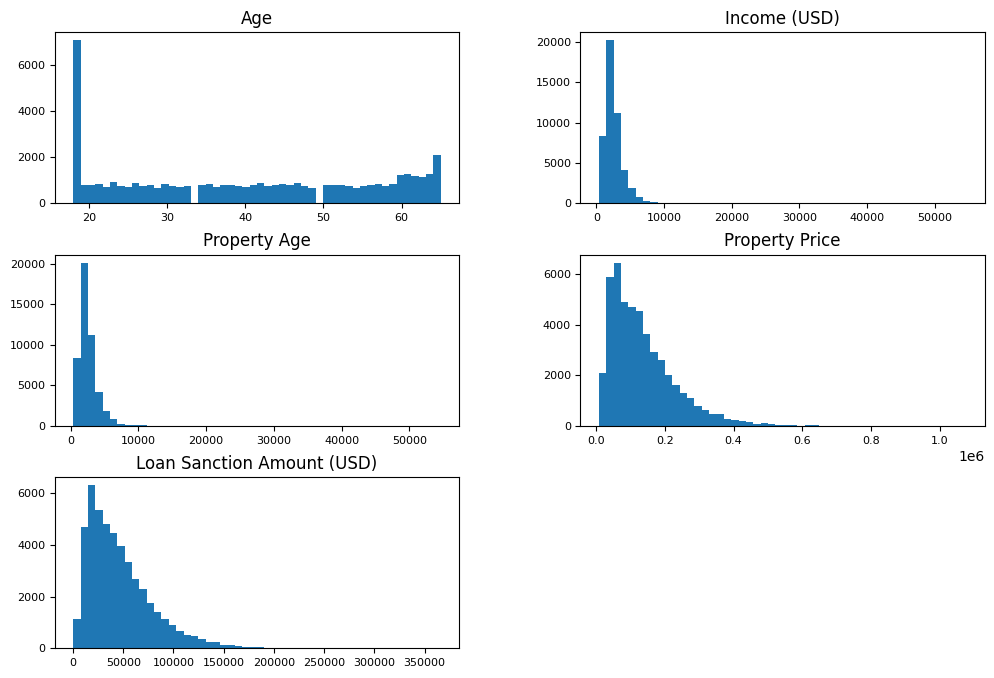

In [342]:
path = "final_house_loan.csv" # Path to your file

df = read_dataset(path)
#ToDo: Show histogram of dataframe
df.hist(figsize=(12, 8), bins=50, xlabelsize=8, ylabelsize=8, grid=False)

## Data Analysis

<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

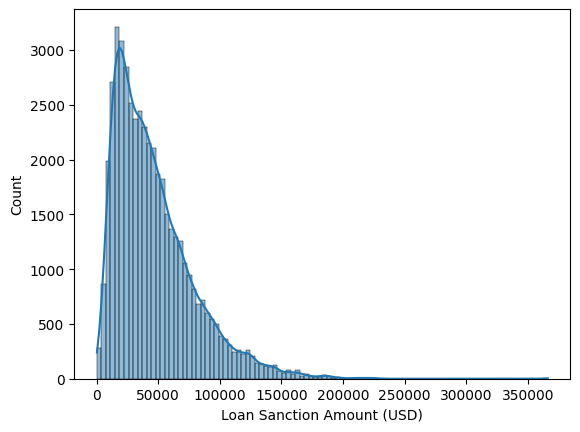

In [343]:
# Data analysis
# Todo: analyze your data here
import seaborn as sns
sns.histplot(df, x="Loan Sanction Amount (USD)", bins=100, kde=True)

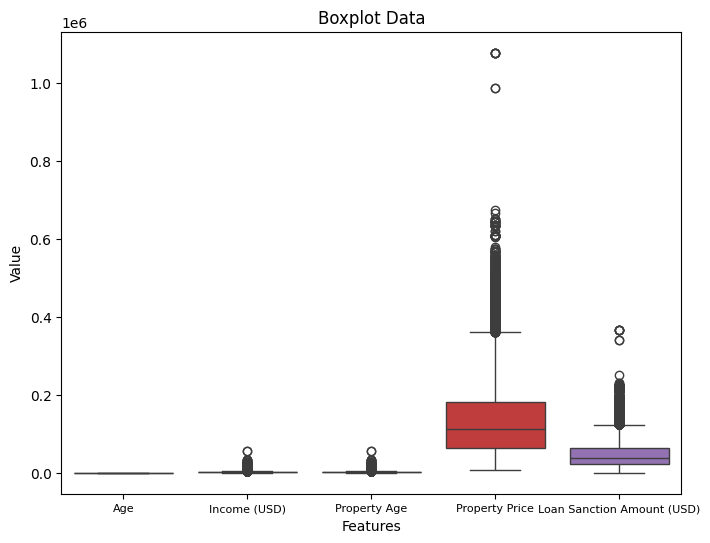

In [344]:
# Boxplot outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplot Data')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(fontsize=8)
plt.grid(False)
plt.show()

In [345]:
# Remove outliers using IQR method
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [346]:
for col in df.select_dtypes(include='number').columns:
    df = remove_outliers_iqr(df, col)

In [347]:
# Null checking
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability              10
Property Age                   0
Property Location              1
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [348]:
display(df.describe())

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000
mean,40.056041,2302.858326,2302.823818,119374.989942,40894.213794
std,16.079108,940.776443,940.842048,72430.646051,24772.734841
min,18.000000,372.700000,370.700000,7859.620000,254.586578
25%,25.000000,1606.910000,1606.952500,59688.410000,20550.812681
50%,40.000000,2120.870000,2120.390000,105505.450000,36274.785571
75%,55.000000,2861.655000,2861.842500,164573.915000,56526.934382
max,65.000000,5024.900000,5022.480000,337806.640000,111870.334006


## Preprocessing

In [349]:
df.shape

(43004, 8)

In [350]:
df.dtypes

Gender                         object
Age                             int64
Income (USD)                  float64
Income Stability               object
Property Age                  float64
Property Location              object
Property Price                float64
Loan Sanction Amount (USD)    float64
dtype: object

In [351]:
df.duplicated().sum()

np.int64(0)

In [352]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it

    # Điền giá trị 'Income Stability' là 'Low' nếu giá trị 'Income (USD)' nhỏ hơn 2302 và 'High' nếu lớn hơn 2302
    # do 2302 là giá trị trung bình của 'Income (USD)'
    df.loc[(df['Income Stability'].isnull()) & (df['Income (USD)'] < 2302), 'Income Stability'] = 'Low'
    df.loc[(df['Income Stability'].isnull()) & (df['Income (USD)'] >= 2302), 'Income Stability'] = 'High'

    df = df.drop_duplicates() # Drop duplicates
    df = df.dropna() # Drop null values 
    return df

In [353]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [354]:
def normalize_data(df):
    # Todo: normalize data into numerical data
    start_time = time.time()
    normalized_data = df.copy()
    # Chuyển cột 'Gender' thành 0 và 1 và cột 'Income Stability' thành 0 và 1
    normalized_data['Gender'] = normalized_data['Gender'].apply(lambda x: 0 if x=="M" else 1)
    normalized_data['Income Stability'] = normalized_data['Income Stability'].apply(lambda x: 0 if x=="High" else 1)
    # Chuyển Property Location label encoder
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    normalized_data['Property Location'] = le.fit_transform(normalized_data['Property Location'])
    
    print("Running time", time.time() - start_time)
    return normalized_data

Running time 0.09913468360900879


<Axes: >

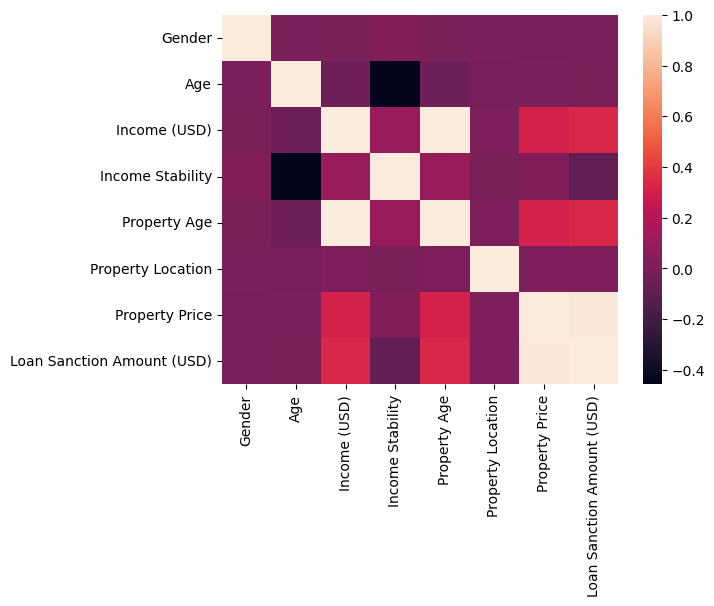

In [355]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [356]:
# Do cột 'Property Age' có độ tương quan giống với cột 'Income (USD)' nên ta có thể bỏ đi.
df = df.drop(columns=['Property Age']) # Drop 'Property Age' column

# Apply machine learning model

## Train-test split

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [358]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes

    columns = df.columns.tolist()
    columns.remove('Loan Sanction Amount (USD)')  # Remove the target column from the feature list
    X = df[columns]  # Todo: Select features
    y = df['Loan Sanction Amount (USD)']  # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [359]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=0.7, random_state=42)# Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    
    # Chuẩn hóa dữ liệu
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    trainX = scaler.fit_transform(trainX)
    testX = scaler.transform(testX)
    
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [360]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(30102, 6)
Test:(12901, 6)


## Basic Linear Regression

In [361]:
from sklearn.linear_model import LinearRegression

def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)        # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  123.51265232320003
mean absolute error of linear model on test set  135.43067018864292
[  112.62679312 -1266.86424141   962.91579084 -3189.6989252
   -51.82242605 24289.33086438]

40808.07871193336


In [362]:
from sklearn.linear_model import Lasso

def build_lasso_model(X, y):
    model = Lasso(alpha=0.1)     # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  123.52531612473958
mean absolute error of linear model on test set  135.44764047130195
[  112.52249904 -1266.63408135   962.81459382 -3189.48051033
   -51.71900377 24289.25842789]

40808.07871193336


In [363]:
from sklearn.linear_model import Ridge

def build_ridge_model(X, y):
    model = Ridge(alpha=0.1, solver='auto')     # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  123.50750058158177
mean absolute error of linear model on test set  135.425971506213
[  112.62526632 -1266.85271607   962.93850609 -3189.68394959
   -51.82173164 24289.24306821]

40808.07871193336


In [364]:
from sklearn.linear_model import ElasticNet

def build_elastic_model(X, y):
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  1024.0255913463043
mean absolute error of linear model on test set  1040.6275050375089
[   91.69810872 -1109.41427926  1267.70526747 -2979.61614505
   -42.13479183 23041.72253156]

40808.07871193336


## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [365]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())   # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  95.38259233596966
mean absolute error of linear model (with poly transform) on test set  106.71550809188142


In [366]:
# Output of polynomial model
# We can call its name
linear_model = poly_model["linearregression"]
# or by number
linear_model = poly_model[1]

print(linear_model.coef_) # print coefficient
print(linear_model.intercept_) # print intercept

[ 1.12796390e+02 -1.32488586e+03  9.65538945e+02 -3.76477829e+02
 -5.63835700e+01  2.43036187e+04  2.99771416e-01  8.98419064e+00
 -3.58305338e+00  4.14083771e+00  1.37834336e+01 -3.32186933e+00
  1.03039283e+01 -1.21170987e+01  1.99889879e+02  2.16859354e+01
  2.68205430e+00 -6.13244408e+00 -5.80085657e+00 -1.35074111e+01
  7.70974902e-02  1.08011022e+03  1.39746337e+01  3.34961121e+00
  1.50333895e+02  7.01857941e+00 -1.94679598e+01]
39684.27120623731


# Visualization

In [367]:
from sklearn.manifold import TSNE

# Split X, y from dataset
columns = df.columns.tolist()     # Columns name
draw_data = df[columns]        # X
draw_data = TSNE(n_components=1, learning_rate='auto', init='random', perplexity=3).fit_transform(draw_data)

In [368]:
from sklearn.model_selection import train_test_split
draw_train_X, draw_test_X ,trainY, testY = split_train_test(draw_data, y, train_size=0.7)

Training:(30102, 1)
Test:(12901, 1)


In [369]:
#model basic
model = build_linear_model(draw_train_X, trainY)
pred = model.predict(draw_train_X)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY))

#model polinomial
poly_model = build_pipeline(draw_train_X, trainY)
poly_pred = poly_model.predict(draw_train_X)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY))

mean absolute error of linear model on train set  20262.964544259816
mean absolute error of linear model (with poly transform) on train set  20270.971261292536


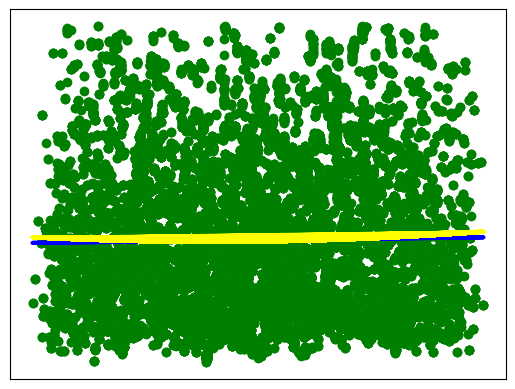

In [370]:
import matplotlib.pyplot as plt

plt.scatter(draw_train_X, trainY, color="g")
plt.plot(draw_train_X, pred, color="blue", linewidth=3)
plt.plot(draw_train_X, poly_pred, color="yellow", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()